In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
# ImageDataGenerator kütüphanesi resimleri toplu değil de sırayla tek tek yükleyerek belleğin daha iyi çalışmasını sağlamaktadır
# Böylece her aşamada bir tane resim okuyarak o resmin öz nitelik haritası çıkarılacaktır

In [2]:
workspace_path = "/Users/ranakaya/Downloads/archive/"

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
training_set=train_datagen.flow_from_directory(workspace_path+'train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

validation_datagen=ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

validation_set=validation_datagen.flow_from_directory(workspace_path+'Validation',
                                                      target_size=(64,64),
                                                      batch_size=32,
                                                      class_mode='binary')


Found 1197 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(workspace_path+'test',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 332 images belonging to 2 classes.


In [4]:
#Model
cnn =tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [5]:

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping callback'i tanımlama
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

# Model eğitimi
history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


2024-05-25 12:31:28.419761: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 17s 448ms/step - loss: 0.7056 - accuracy: 0.5238 - val_loss: 0.6882 - val_accuracy: 0.5547
Epoch 2/20
38/38 [==============================] - 16s 430ms/step - loss: 0.6889 - accuracy: 0.5556 - val_loss: 0.6832 - val_accuracy: 0.5547
Epoch 3/20
38/38 [==============================] - 16s 428ms/step - loss: 0.6839 - accuracy: 0.5556 - val_loss: 0.6791 - val_accuracy: 0.5625
Epoch 4/20
38/38 [==============================] - 16s 426ms/step - loss: 0.6843 - accuracy: 0.5639 - val_loss: 0.6842 - val_accuracy: 0.5918
Epoch 5/20
38/38 [==============================] - 16s 430ms/step - loss: 0.6748 - accuracy: 0.5898 - val_loss: 0.6645 - val_accuracy: 0.5625
Epoch 6/20
38/38 [==============================] - 17s 442ms/step - loss: 0.6706 - accuracy: 0.5898 - val_loss: 0.6837 - val_accuracy: 0.5684
Epoch 7/20
38/38 [==============================] - 17s 439ms/step - loss: 0.6757 - accuracy: 0.5789 - val_loss: 0.6671 - val_accuracy: 0.5781
Epoch 8/20

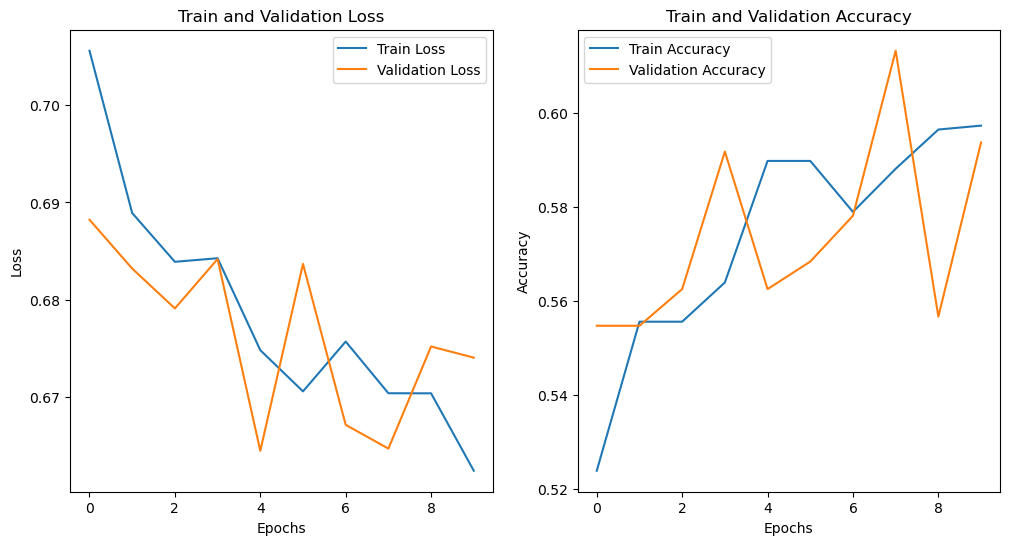

In [6]:
# Eğitim sonuçlarını grafiğe dökme
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
# Test veri seti üzerinde tahmin yapma
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)  # Tahmin edilen olasılıkları binary sınıflara çevirme

# Gerçek değerler
y_true = test_set.classes
y_true = (y_true > 0.5).astype(int) 

print(y_pred)
print('-----------------------------------------------------------')
print(y_true)

11/11 [==============================] - 3s 271ms/step
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


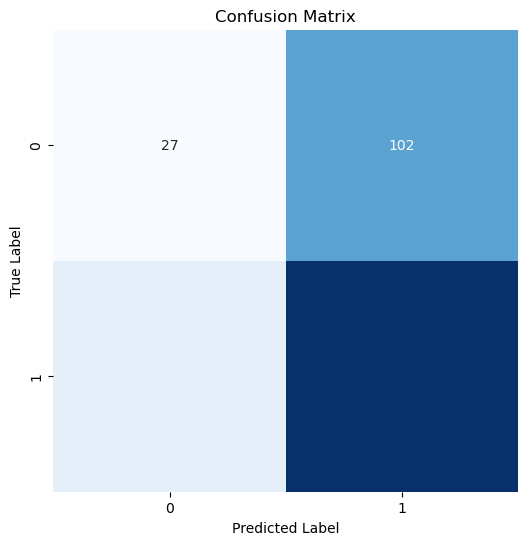

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix oluşturma
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
print(cm)

[[ 27 102]
 [ 40 163]]
